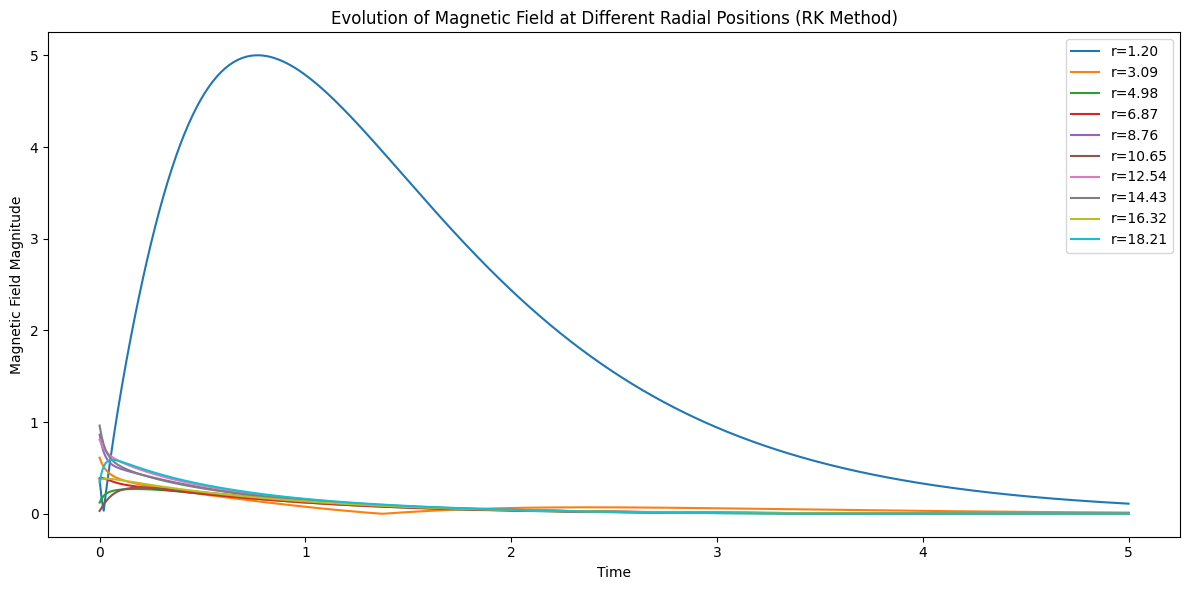

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta_t = 0.5 # Increased turbulent magnetic diffusivity
# Radial grid
R_max = 20  # Maximum radial distance
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 5.0  # Increased total time
Nt = 500  # Increased number of time steps
dt = T / Nt

# Initialize magnetic field B (considering only the radial component) with different initial values
R = np.linspace(1.2, R_max, Nr)
# Initial value: Let's say a random initial field
np.random.seed(42)
Br = np.random.rand(Nr)
#Br = np.sin(4*np.pi*R/R_max)

# Function to compute the radial Laplacian of B
def compute_laplacian(R,Br):
    return np.gradient((1/R)*np.gradient(R*Br, dr), dr) - ((np.pi)**2)/(4) * Br

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(R, Br, dt):
    k1 = dt * eta_t * compute_laplacian(R, Br)
    k2 = dt * eta_t * compute_laplacian(R + 0.5 * k1, Br + 0.5 * k1)
    k3 = dt * eta_t * compute_laplacian(R + 0.5 * k2, Br + 0.5 * k2)
    k4 = dt * eta_t * compute_laplacian(R + k3, Br + k3)
    return Br + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Store the evolution of magnetic field at different radial positions
evolution_at_r = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_at_r[t, :] = np.copy(Br)
    Br = runge_kutta_step(R, Br, dt)

# Plot the evolution of magnetic field at different radial positions over time
plt.figure(figsize=(12, 6))
for i in range(0, Nr, Nr//10):
    plt.plot(np.linspace(0, T, Nt + 1), np.abs(evolution_at_r[:, i]), label=f'r={R[i]:.2f}')
    
plt.xlabel('Time')
plt.ylabel('Magnetic Field Magnitude')
plt.title('Evolution of Magnetic Field at Different Radial Positions (RK Method)')
plt.legend()
plt.tight_layout()
#plt.xlim(8.975,9.10)
plt.show()


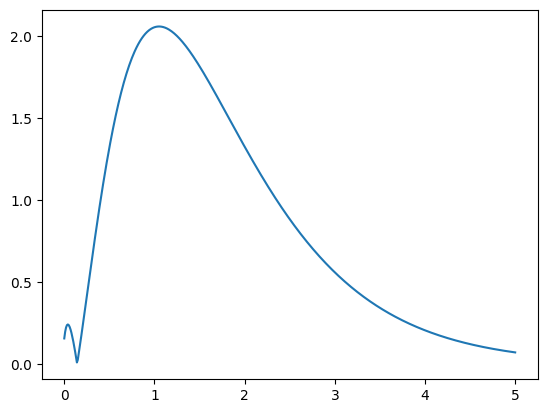

In [51]:
plt.plot(np.linspace(0, T, Nt + 1), np.abs(evolution_at_r[:, 4]), label=f'r={R[4]:.2f}')